
### Exercise 1 -  Use data from Danmarks Statistik - Databanken

1. Go to https://www.dst.dk/da/Statistik/statistikbanken/api
2. Open 'Konsol' and click 'Start Konsol'
3. In the console at pt 1: choose 'Retrieve tables' pt 2: choose get request and json format and pt 3: execute:

A) Check the result

B) In the code below this same get request is used to get information about all available data tables in 'databanken'.

4. Change pt. 1 in the console to 'Retrieve data' pt 2: get request and Table id: 'FOLK1A', format: csv, delimiter: semicolon and click: 'Variable and value codes' and choose some sub categories (Hint: hover over the codes to see their meaning). Finally execute and see what data you get.

A) What is the change in pct of divorced danes from 2008 to 2020?

In [141]:
import pandas as pd

df = pd.read_csv('divorced_danes.csv', delimiter=';')
year = df.TID
number_of_divorced = df.INDHOLD

print("Year: " + str(year[0][:4]) + "\nDivorced danes: " + str(number_of_divorced[0]))
print("\nYear: " + str(year[1][:4]) + "\nDivorced danes: " + str(number_of_divorced[1]))

pct_divorced = int((number_of_divorced[1] - number_of_divorced[0])/(number_of_divorced[0])*100)
print("\nThe pct of divorced danes from 2008-2020 are: " + str(pct_divorced) + " %")



Year: 2008
Divorced danes: 428864

Year: 2020
Divorced danes: 544588

The pct of divorced danes from 2008-2020 are: 26 %


B) Which of the 5 biggest cities has the highest percentage of 'Never Married'?

In [139]:
df = pd.read_csv('never_married.csv', delimiter=";")

total_for_each_city = df.INDHOLD[::2]
print(total_for_each_city)

never_married_for_each_city = df.INDHOLD[1::2]
print(never_married_for_each_city)

data = df.INDHOLD

cph = int((data[1] / data[0]) * 100)
print("\nIn Copenhagen " + str(cph) + " % is not married")

aalborg = int((data[3] / data[2]) * 100)
print("In Aalborg " + str(aalborg) + " % is not married")

odense = int((data[5] / data[4]) * 100)
print("In Odense " + str(odense) + " % is not married")

vejle = int((data[7] / data[6]) * 100)
print("In Vejle " + str(vejle) + " % is not married")

aarhus = int((data[9] / data[8]) * 100)
print("In Aarhus " + str(aarhus) + " % is not married")

print("\n\nThe city with most not married people is: " + str(df.OMRÅDE[0]) + " with " + str(cph) + " %")


0    632340
2    217075
4    204895
6    115748
8    349983
Name: INDHOLD, dtype: int64
1    412512
3    118194
5    112490
7     54448
9    208509
Name: INDHOLD, dtype: int64

In Copenhagen 65 % is not married
In Aalborg 54 % is not married
In Odense 54 % is not married
In Vejle 47 % is not married
In Aarhus 59 % is not married


The city with most not married people is: København with 65 %


C) Show a bar chart of changes in marrital status in Copenhagen from 2008 till now

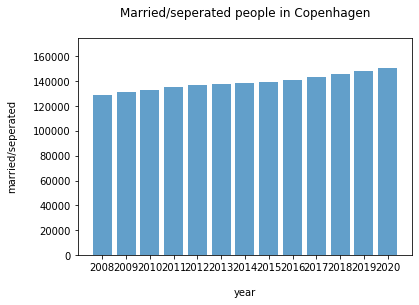

In [142]:
import matplotlib.pyplot as plt

df = pd.read_csv("marriage_change_cph.csv", delimiter=";")

df["TID"] = df["TID"].str[:4]

plt.bar(df.TID, df.INDHOLD, alpha=0.7)
plt.ylim([0,175000])
plt.title("Married/seperated people in Copenhagen\n")
plt.xlabel("\nyear")
plt.ylabel("married/seperated\n")
plt.plot()
plt.show()


D) Show a bar chart of 'Married' and 'Never Married' for all ages in DK (Hint: 2 bars of different color)

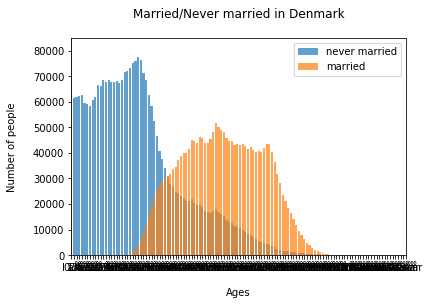

In [116]:
df = pd.read_csv("married_and_not.csv", delimiter=";")

df_gift = df[df.CIVILSTAND == "Gift/separeret"]
df_ugift = df[df.CIVILSTAND == "Ugift"]

plt.bar(df_ugift.ALDER, df_ugift.INDHOLD, label="never married", alpha=0.7)
plt.bar(df_gift.ALDER, df_gift.INDHOLD,label="married", alpha=0.7)

plt.title("Married/Never married in Denmark\n")
plt.xlabel("\nAges")
plt.ylabel("Number of people\n")
plt.axis([0, 125, 0, 85000])
plt.legend()
plt.plot()

plt.show()

### Exercise 2 - use another table

Go to https://www.dst.dk/da/Statistik/statistikbanken/api

Choose any of the other tables in 'databanken' to find interesting data.

1. Collect the data
2. Pose 5 or more interesing questions to the data
3. Answer the questions by aggregating the data
4. Illustrate the answers with visual plots